climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
Annual Mean EBM with ice line: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
   SW: <class 'climlab.radiation.absorbed_shorwave.SimpleAbsorbedShortwave'>
   diffusion: <class 'climlab.dynamics.meridional_heat_diffusion.MeridionalHeatDiffusion'>

Integrating for 450 steps, 1826.2110000000002 days, or 5 years.


Total elapsed time is 5.000000000000044 years.


array(-20.37440018)

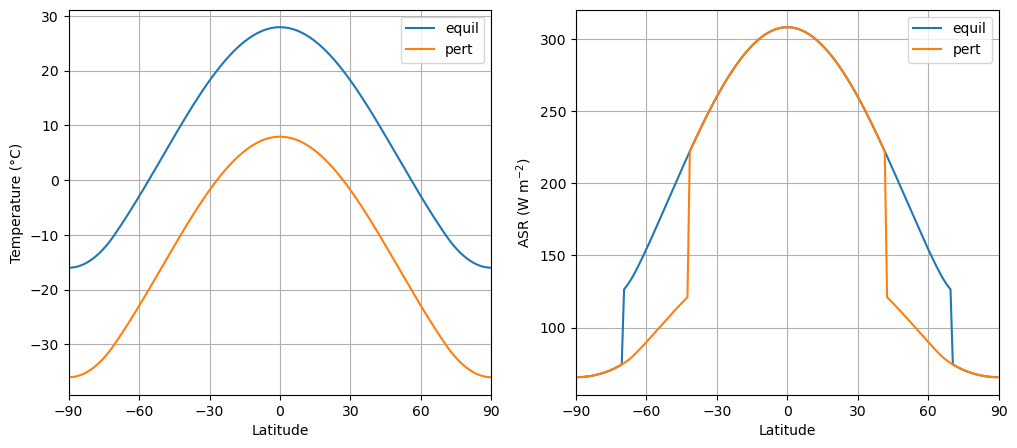

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from climlab import constants as const
import climlab

#  for convenience, set up a dictionary with our reference parameters
param = {'A':210, 'B':2, 'a0':0.3, 'a2':0.078, 'ai':0.62, 'Tf':-10., 'D':0.55}
model1 = climlab.EBM_annual(name='Annual Mean EBM with ice line', num_lat=180, **param )
print(model1)

model1.integrate_years(5)
Tequil = np.array(model1.Ts)
ALBequil = np.array(model1.albedo)
OLRequil = np.array(model1.OLR)
ASRequil = np.array(model1.ASR)

model1.Ts -= 20.
model1.compute_diagnostics()

my_ticks = [-90,-60,-30,0,30,60,90]
lat = model1.lat

fig = plt.figure( figsize=(12,5) )

ax1 = fig.add_subplot(1,2,1)
ax1.plot(lat, Tequil, label='equil') 
ax1.plot(lat, model1.state['Ts'], label='pert' )
ax1.grid()
ax1.legend()
ax1.set_xlim(-90,90)
ax1.set_xticks(my_ticks)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Temperature (°C)')

ax2 = fig.add_subplot(1,2,2)
ax2.plot( lat, ASRequil, label='equil') 
ax2.plot( lat, model1.diagnostics['ASR'], label='pert' )
ax2.grid()
ax2.legend()
ax2.set_xlim(-90,90)
ax2.set_xticks(my_ticks)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('ASR (W m$^{-2}$)')

climlab.global_mean( model1.ASR - ASRequil )


Text(0.5, 0, 'Latitude')

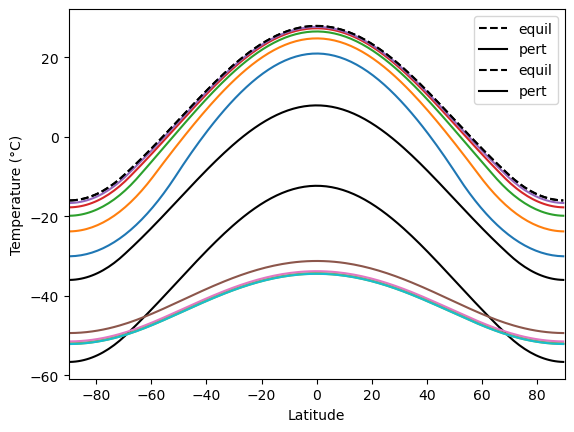

In [2]:
plt.plot( lat, Tequil, 'k--', label='equil' )
plt.plot( lat, model1.Ts, 'k-', label='pert' )
plt.grid(); plt.xlim(-90,90); plt.legend()
for n in range(5):
    model1.integrate_years(years=1.0, verbose=False)
    plt.plot(lat, model1.Ts)
plt.ylabel('Temperature (°C)')
plt.xlabel('Latitude')

model1.Ts -= 40.
model1.compute_diagnostics()

climlab.global_mean( model1.ASR - ASRequil )

plt.plot( lat, Tequil, 'k--', label='equil' )
plt.plot( lat, model1.Ts, 'k-', label='pert' )
plt.grid(); plt.xlim(-90,90); plt.legend()
for n in range(5):
    model1.integrate_years(years=1.0, verbose=False)
    plt.plot(lat, model1.Ts)
plt.ylabel('Temperature (°C)')
plt.xlabel('Latitude')
